In [136]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np

## Data Loading 

In [137]:
df = pd.read_csv("D:/ML Projects/Deeplearning/ANN/Telco customer churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [138]:
# Checking data types for each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [139]:
# Converting TotalCharges into numerics
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [141]:
df.drop(["customerID"],inplace = True,axis = 1)

In [142]:
 df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [143]:
df.dropna(axis = 0,inplace = True)
print(df.shape)
print(df[df.TotalCharges != ' '].shape)

(7032, 20)
(7032, 20)


C:\Users\w530\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [144]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Visualization 

In [145]:
Churn_count = df.Churn.value_counts()
Churn_count.keys()

Index(['No', 'Yes'], dtype='object')

Text(0.5, 1.0, 'Churned')

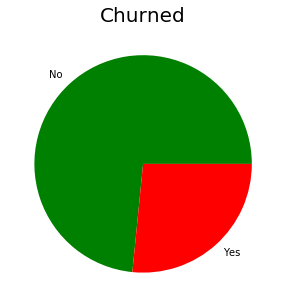

In [146]:
plt.figure(figsize = (10,5))
plt.pie(Churn_count.values,labels = Churn_count.keys(), colors = ["green", "red"])
plt.title("Churned",size =20)

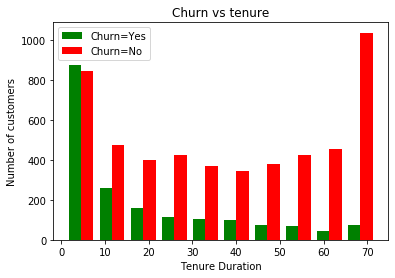

In [147]:
tenure_churn_no = df[df.Churn == "No"].tenure
tenure_churn_yes = df[df.Churn == "Yes"].tenure
plt.xlabel("Tenure Duration")
plt.ylabel("Number of customers")
plt.title("Churn vs tenure")
plt.hist([tenure_churn_yes, tenure_churn_no], color = ["green","red"], label = ["Churn=Yes","Churn=No"])
plt.legend()

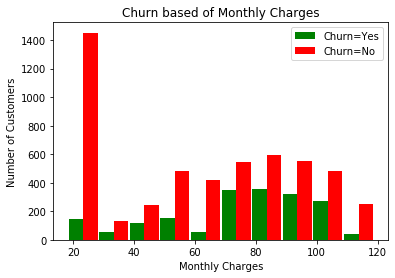

In [148]:
mc_churn_no = df[df.Churn == "No"].MonthlyCharges
mc_churn_yes = df[df.Churn == "Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Churn based of Monthly Charges")

plt.hist([mc_churn_yes,mc_churn_no], rwidth=0.95, color=["green","red"], label=["Churn=Yes","Churn=No"])
plt.legend()

In [149]:
for col in df:
    
    if col == "MonthlyCharges" or col == "TotalCharges":
        continue
    print(f'{col} : {set(df[col])}')

gender : {'Male', 'Female'}
SeniorCitizen : {0, 1}
Partner : {'Yes', 'No'}
Dependents : {'Yes', 'No'}
tenure : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
PhoneService : {'Yes', 'No'}
MultipleLines : {'Yes', 'No phone service', 'No'}
InternetService : {'Fiber optic', 'DSL', 'No'}
OnlineSecurity : {'Yes', 'No internet service', 'No'}
OnlineBackup : {'Yes', 'No internet service', 'No'}
DeviceProtection : {'Yes', 'No internet service', 'No'}
TechSupport : {'Yes', 'No internet service', 'No'}
StreamingTV : {'Yes', 'No internet service', 'No'}
StreamingMovies : {'Yes', 'No internet service', 'No'}
Contract : {'Month-to-month', 'One year', 'Two year'}
PaperlessBilling : {'Yes', 'No'}
PaymentMethod : {'Credit card (automatic)', 'Bank transfer (automatic)', 'Ele

In [150]:
def removal_yes_no(x):
    if x == "Yes" or x == "Male" :
        return 1
    else:
        return 0

catagories_yes_no = ["gender","Dependents","Partner","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for col in catagories_yes_no:
    df[col] = df[col].apply(removal_yes_no)


In [151]:
for col in df:
    
    if col == "MonthlyCharges" or col == "TotalCharges":
        continue
    print(f'{col} : {set(df[col])}')
print(df.shape)

gender : {0, 1}
SeniorCitizen : {0, 1}
Partner : {0, 1}
Dependents : {0, 1}
tenure : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
PhoneService : {0, 1}
MultipleLines : {0, 1}
InternetService : {'Fiber optic', 'DSL', 'No'}
OnlineSecurity : {0, 1}
OnlineBackup : {0, 1}
DeviceProtection : {0, 1}
TechSupport : {0, 1}
StreamingTV : {0, 1}
StreamingMovies : {0, 1}
Contract : {'Month-to-month', 'One year', 'Two year'}
PaperlessBilling : {0, 1}
PaymentMethod : {'Credit card (automatic)', 'Bank transfer (automatic)', 'Electronic check', 'Mailed check'}
Churn : {0, 1}
(7032, 20)


In [152]:
df = pd.get_dummies(data=df, columns = ["InternetService","Contract", "PaymentMethod"])

In [153]:
print(df.columns)
df.sample(4)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1890,0,0,1,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
801,0,0,0,0,10,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2755,1,0,1,0,46,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
6544,0,1,0,0,42,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0


In [154]:
col_to_scale = ["tenure","MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [155]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [156]:
X = df.drop(["Churn"] , axis = 1)
y = df.Churn

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(X.shape)
print(y.shape)

(7032, 26)
(7032,)


In [159]:
import tensorflow as tf 
from tensorflow import keras 

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
5625/5625 [==============================] - 1s 139us/sample - loss: 0.5203 - acc: 0.7383
Epoch 2/100
5625/5625 [==============================] - 0s 85us/sample - loss: 0.4435 - acc: 0.7911
Epoch 3/100
5625/5625 [==============================] - 0s 71us/sample - loss: 0.4292 - acc: 0.7979
Epoch 4/100
5625/5625 [==============================] - 0s 88us/sample - loss: 0.4230 - acc: 0.7996
Epoch 5/100
5625/5625 [==============================] - 0s 78us/sample - loss: 0.4198 - acc: 0.8034
Epoch 6/100
5625/5625 [==============================] - 0s 81us/sample - loss: 0.4178 - acc: 0.8030
Epoch 7/100
5625/5625 [==============================] - 0s 79us/sample - loss: 0.4159 - acc: 0.8059
Epoch 8/100
5625/5625 [==============================] - 0s 80us/sample - loss: 0.4135 - acc: 0.8069
Epoch 9/100
5625/5625 [==============================] - 0s 75us/sample - loss: 0.4104 - acc: 0.8080
Epoch 10/100
5625/5625 [==============================] - 0s 71us/sample - loss: 0.4108 - 

In [160]:
model.evaluate(X_test,y_test)

1407/1407 [==============================] - 0s 92us/sample - loss: 0.5052 - acc: 0.7818


[0.5051562461178609, 0.7818053]

In [161]:
yp = model.predict(X_test)
yp[:5]

array([[0.00895649],
       [0.72204435],
       [0.41798994],
       [0.63492477],
       [0.59022117]], dtype=float32)

In [164]:
y_test[:5]

1778    0
5036    1
1106    0
1665    0
927     1
Name: Churn, dtype: int64

In [165]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [166]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.60      0.47      0.53       366

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'truth')

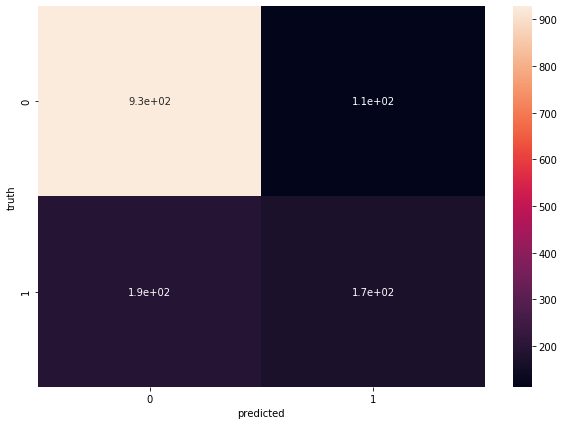

In [185]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel('truth')

<tf.Tensor 'confusion_matrix_6/SparseTensorDenseAdd:0' shape=(2, 2) dtype=int32>